# Neural Network Regression with Tensorflow

In [37]:
import tensorflow as tf

### Creating data to view and fit

In [38]:
import numpy as np
import matplotlib.pyplot as plt

#### Create features

In [39]:
X = np.array([1.0,-1.5, 5.0,7.0,9.0,-5.0, -8.0])

#### Create labels

In [40]:
Y = np.array([2.0,-3.0,10.0,14.0,18.0,-10.0,-16.0])

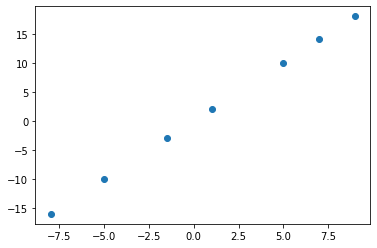

In [41]:
plt.scatter(X,Y)

### Input and Output shapes

In [42]:
house_info = tf.constant(["bathroom","bedroom","garage"])

In [43]:
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bathroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

### Convert numpy arrays into tensors

In [44]:
X = tf.cast(tf.constant(X), dtype=tf.float32)

In [45]:
y = tf.cast(tf.constant(Y), dtype=tf.float32)

In [46]:
X,y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1. , -1.5,  5. ,  7. ,  9. , -5. , -8. ], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([  2.,  -3.,  10.,  14.,  18., -10., -16.], dtype=float32)>)

### Steps in modelling with tensorflow.
###### 1. <font color="blue">Creating a model</font> - define the input and output layers, as well as hidden layers of a deep learning model
###### 2. <font color="blue">Compiling a model</font> - define the loss function(which tells our model how wrong it is) and optimizer( tells our model how to improve the ###### pattern it is learning), evaluation metrics - what we can use to interpret the performance of our model
###### 3. <font color="blue">Fitting the model</font> 


In [47]:
#Set random Seed
tf.random.set_seed(42)
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#1. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is Stochastic gradient descent
              metrics =["mae"])

model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 0s/step - loss: 7.4561 - mae: 7.4561
Epoch 2/5
1/1 [==============================] - 0s 0s/step - loss: 7.1840 - mae: 7.1840
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 6.9119 - mae: 6.9119
Epoch 4/5
1/1 [==============================] - 0s 0s/step - loss: 6.6398 - mae: 6.6398
Epoch 5/5
1/1 [==============================] - 0s 0s/step - loss: 6.3677 - mae: 6.3677


### try and make a prediction using our model

In [48]:
model.predict([17.0])

array([[14.130304]], dtype=float32)

#### the Answeer we got is approximatel correct

#### Now we want to improve our model. Add more layers and change optimisation.

In [49]:
#Set random Seed
tf.random.set_seed(42)
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
#1. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is Stochastic gradient descent
              metrics =["mae"])

model.fit(X,y,epochs=100,verbose=0)

In [50]:
model.predict([17.0])

array([[33.960316]], dtype=float32)

In [51]:
#Set random Seed
tf.random.set_seed(42)
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
#1. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # SGD is Stochastic gradient descent
              metrics =["mae"])

model.fit(X,y,epochs=100,verbose=0)

In [52]:
model.predict([17.0])

array([[36.540962]], dtype=float32)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"]
              )

model.fit(X,y,epochs=200,verbose=0)

In [54]:
model.predict([15.0])

array([[27.494907]], dtype=float32)

### Create with an extra hidden layer

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
             )

model.fit(X,y,epochs=50,verbose=0)

In [56]:
model.predict([1000.0])

array([[1928.1935]], dtype=float32)

## Evaluating a Model

### hyperparameter is a dial that we adjust to improve models like adding layers, changingoptimisation etc.

##### Make a bigger dataset

In [57]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

##### Make labels for the dataset

In [58]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

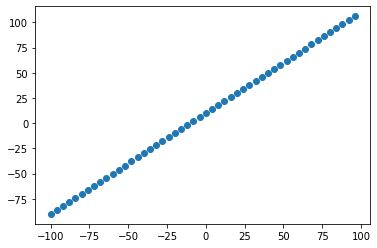

In [59]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

##### The 3 sets...
##### Training set- modellearns from this data (70 - 80%)
##### validation Set - tweek diff things (10 - 15%)
##### Test Set - The model gets evaluated on this data to test what is has learned, this set is typically 10 - 15% of the total data available


In [60]:
# Checkthe length of hor many samples we have
len(X)

50

In [61]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test),len(y_train),len(y_test)


(40, 10, 40, 10)

In [62]:
#### Visualising the data
#### Now we've got our data intraining and test sets ... lets visualize it again!

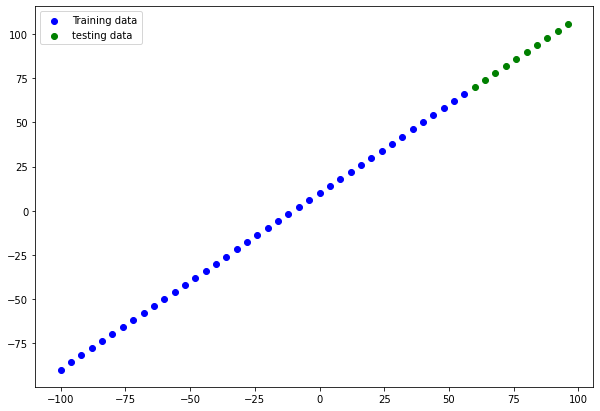

In [63]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label ="testing data")
# Show a legend
plt.legend()

#### Lets have a look at how to build a neural network for our data

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])

### Fit the model
#model.fit()

In [65]:
#model.summary()
"""
ValueError                                Traceback (most recent call last)
<ipython-input-32-5f15418b3570> in <module>
----> 1 model.summary()

~\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py in summary(self, line_length, positions, print_fn)
   2349     
   2350     if not self.built:
-> 2351       raise ValueError('This model has not yet been built. '
   2352                        'Build the model first by calling `build()` or calling '
   2353                        '`fit()` with some data, or specify '

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.
"""

"\nValueError                                Traceback (most recent call last)\n<ipython-input-32-5f15418b3570> in <module>\n----> 1 model.summary()\n\n~\x07naconda3\\envs\tf\\lib\\site-packages\tensorflow\\python\\keras\\engine\training.py in summary(self, line_length, positions, print_fn)\n   2349     \n   2350     if not self.built:\n-> 2351       raise ValueError('This model has not yet been built. '\n   2352                        'Build the model first by calling `build()` or calling '\n   2353                        '`fit()` with some data, or specify '\n\nValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.\n"

In [66]:
# lets create a model which builds automatically by defining the imput_shape(num of variables)
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name ="input_layer"), #dont use space in name else you will get error
    tf.keras.layers.Dense(1, name="output_layer")
], name="test_model_1")
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])

### Fit the model
#model.fit()
model.summary()

Model: "test_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


##### Total params - total number of parameters in the model.
##### Trainable Parameters - these are the parameters(patterns) the model can update as it trains
##### Non- trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)


##### Lets fit our model to training data

In [67]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [68]:
model.predict([10, 20])

array([[13.205643],
       [24.67495 ]], dtype=float32)

##### if these modules are not installed, you get error from tensorflow.keras.utils import plot_model
##### plot_model(model=model)
##### ('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


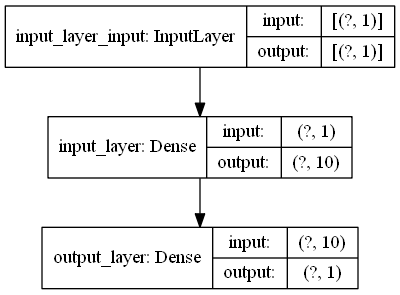

In [69]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [70]:
# make some predictions
y_pred = model.predict(X_test)

In [71]:
y_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [72]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

##### If you feel like you are going to reuse some kind of functionality in the future, its good idea to turn it into function

##### Lets's create a plotting function

In [73]:
def plot_predictions(train_data = X_train,
                    train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    # Plot models predictions in red
    plt. scatter(test_data, predictions, c="r", label="predictions")
    # Show the legend
    plt.legend();

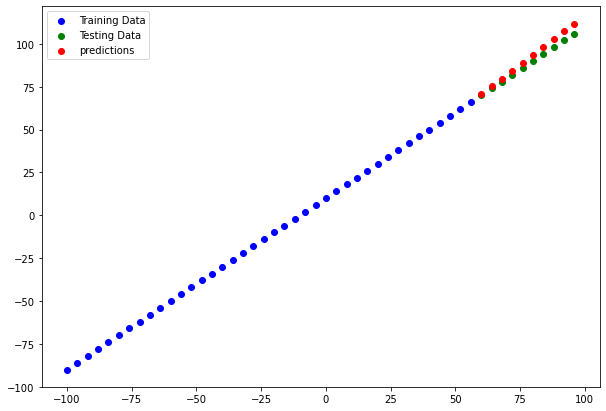

In [74]:
plot_predictions()

##### Evaluating our models predictions with regression evaluation metrics

In [75]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

##### calculate the mean square error

In [76]:
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([436.42627, 297.38196, 200.43198, 145.57669, 132.81558, 162.14896,
       233.57657, 347.09875, 502.71558, 700.42615], dtype=float32)>

In [77]:
# remove single dimensions frompredictions
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [78]:
# Make some functions to reuse MAE and MSE

def mae1(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred = y_pred)

def mse1(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred = y_pred)

##### Running experiments to improve our model

In [79]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    #tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 0s/step - loss: 8.3980

2/2 [==============================] - 0s 0s/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 0s/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 0s/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 0s/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 0s/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 0s/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 0s/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 0s/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 0s/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 0s/step - loss: 12.6834 - mae: 12.6834
Epoch 98/100
2/2 [==============================] - 0s 0s/step - loss: 8.6762 - mae

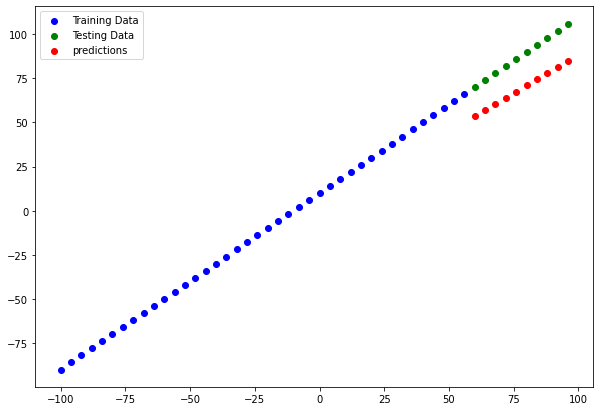

In [80]:
# make and plot predictions formodel_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [81]:
# Calculate model_1 evaluation matrix
mae_1 = mae1(y_test, y_preds_1)
mse_1 = mse1(y_test, y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([34.428905, 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
        14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1317.3499 , 1089.5105 ,  885.9652 ,  706.7138 ,  551.7559 ,
         421.0921 ,  314.72183,  232.64555,  174.86307,  141.37427],
       dtype=float32)>)

##### <font color="red">WE should get a single number.therefore we need to use tf.squeeze function to arrange the matrix appropriately.</font>

In [82]:
tf.constant(y_preds_1)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)>

In [83]:
tf.squeeze(y_preds_1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
       74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>

In [84]:
mae_1 = mae1(y_test, tf.squeeze(y_preds_1))
mse_1 = mse1(y_test, tf.squeeze(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

##### Build `model 2`

In [85]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100,verbose=0)

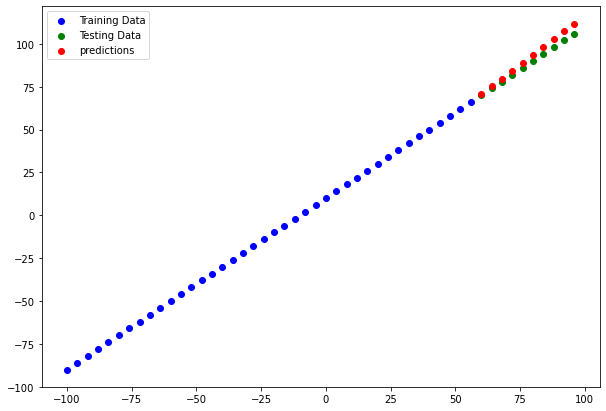

In [86]:
# make and plot predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

#### Build `model 3`

##### Try with mse not mae

In [87]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_3.fit(X_train, y_train, epochs=100,verbose=0)

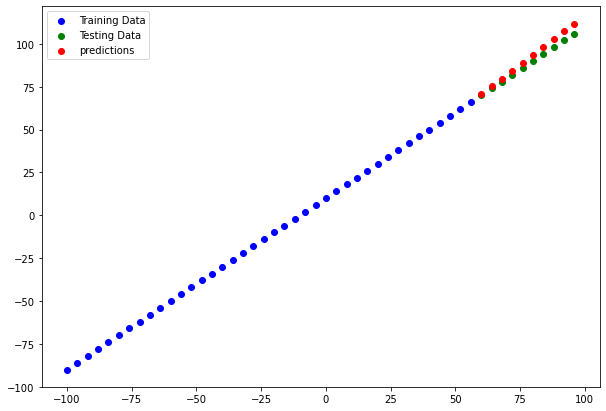

In [88]:
# make and plot predictions for model_2

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

### Calculate Evaluation metrics

In [89]:
mae_2 = mae1(y_test,tf.squeeze(y_preds_2))
mse_2 = mse1(y_test,tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [95]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=["mae"])

model_4.fit(X_train,y_train, epochs=500,verbose=0)

In [100]:
y_preds_4 = model_4.predict(X_test)
mae_3 = mae1(y_test,tf.squeeze(y_preds_4))
mse_3 = mse1(y_test,tf.squeeze(y_preds_4))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.34461594>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.12003885>)

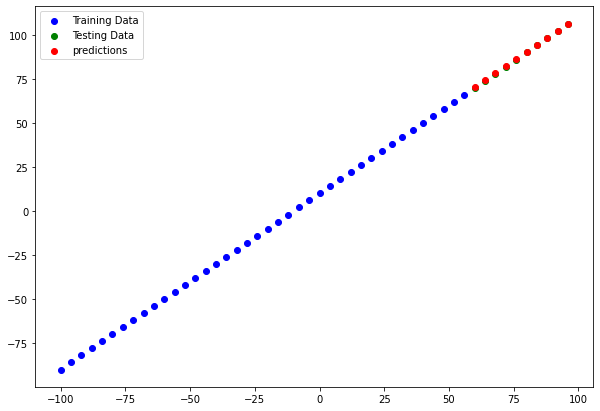

In [101]:
plot_predictions(predictions=y_preds_4)

In [102]:
import pandas as pd

In [104]:
model_results = [["model_1",mae_1, mse_1],
                ["model_2",mae_2, mse_2],
                ["model_3",mae_3, mse_3]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,"tf.Tensor(18.745327, shape=(), dtype=float32)","tf.Tensor(353.57336, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(3.19694, shape=(), dtype=float32)","tf.Tensor(13.070127, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(0.34461594, shape=(), dtype=float32)","tf.Tensor(0.12003885, shape=(), dtype=float32)"


In [105]:
model_results = [["model_1",mae_1.numpy(), mse_1.numpy()],
                ["model_2",mae_2.numpy(), mse_2.numpy()],
                ["model_3",mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results


,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,0.344616,0.120039


##### <font color="blue">Looks like model 3 performed best.</font>

#### Saving a model using SavedModel Format and HDF5 format

In [107]:
# Save model using SavedModel Format. This is for those who want to use this modelinside tensorflow.
model_4.save("best_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model\assets


In [108]:
# Save model using HDF5 Format. Can also be used for mobile or web
model_4.save("best_model.h5")

### Loading in a saved model

##### Load in saved model format

In [111]:
loaded_SavedModel_format = tf.keras.models.load_model("best_model")
loaded_SavedModel_format.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [112]:
model_4.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### compare model_2 predictions with savemodel format

In [124]:
model_4_preds = model_4.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_4_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [125]:
model_4_preds, loaded_SavedModel_format_preds

(array([[ 70.28859 ],
        [ 74.30104 ],
        [ 78.31349 ],
        [ 82.32594 ],
        [ 86.338394],
        [ 90.35084 ],
        [ 94.3633  ],
        [ 98.37574 ],
        [102.38819 ],
        [106.400635]], dtype=float32),
 array([[ 70.28859 ],
        [ 74.30104 ],
        [ 78.31349 ],
        [ 82.32594 ],
        [ 86.338394],
        [ 90.35084 ],
        [ 94.3633  ],
        [ 98.37574 ],
        [102.38819 ],
        [106.400635]], dtype=float32))

In [126]:
mae1(y_true=y_test, y_pred=tf.squeeze(model_4_preds)) == mae1(y_true=y_test, y_pred=tf.squeeze(loaded_SavedModel_format_preds))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [127]:
model_4_preds.squeeze()

array([ 70.28859 ,  74.30104 ,  78.31349 ,  82.32594 ,  86.338394,
        90.35084 ,  94.3633  ,  98.37574 , 102.38819 , 106.400635],
      dtype=float32)

In [128]:
loaded_SavedModel_format_preds.squeeze()

array([ 70.28859 ,  74.30104 ,  78.31349 ,  82.32594 ,  86.338394,
        90.35084 ,  94.3633  ,  98.37574 , 102.38819 , 106.400635],
      dtype=float32)

#### Loading the file using h5 file format

In [136]:
loaded_h5_model = tf.keras.models.load_model("./base_model.h5")
loaded_h5_model.summary()

OSError: SavedModel file does not exist at: ./base_model.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
model_4_preds = model_4.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)